In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
%matplotlib inline

In [3]:
from datetime import datetime

In [4]:
df = pd.read_excel('site_16220200507220917.xlsx')
df.head()

,CENTRAL POLLUTION CONTROL BOARD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,CONTINUOUS AMBIENT AIR QUALITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Date: Thursday, May 07 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time: 10:09:17 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Bengaluru,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pip list

Package                       Version
----------------------------- -------------------
absl-py                       0.9.0
alabaster                     0.7.12
argh                          0.26.2
asn1crypto                    1.3.0
astor                         0.8.1
astroid                       2.3.3
astunparse                    1.6.3
atomicwrites                  1.3.0
attrs                         19.3.0
autopep8                      1.4.4
Babel                         2.8.0
backcall                      0.1.0
bcrypt                        3.1.7
beautifulsoup4                4.6.3
bleach                        3.1.0
cachetools                    4.1.0
certifi                       2020.4.5.1
cffi                          1.14.0
chardet                       3.0.4
cloudpickle                   1.4.0
cmdstanpy                     0.4.0
colorama                      0.4.3
convertdate                   2.2.0
cryptography                  2.8
cycler                        0.10.0
Cyth

You should consider upgrading via the 'C:\Users\rahul\.conda\envs\tsa_course\python.exe -m pip install --upgrade pip' command.


In [6]:
## Data cleaning
df = df[15:]
df.head()

,CENTRAL POLLUTION CONTROL BOARD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
15,From Date,To Date,CO,NO,NO2,PM2.5,SO2,NaN,NaN
16,01-05-2019 00:00,02-05-2019 00:00,0.93,3.4,41.2,120.54,3.13,NaN,NaN
17,02-05-2019 00:00,03-05-2019 00:00,0.72,4.04,23.08,74.99,2.67,NaN,NaN
18,03-05-2019 00:00,04-05-2019 00:00,0.87,3.62,20.78,79.15,2.14,NaN,NaN
19,04-05-2019 00:00,05-05-2019 00:00,0.92,3.71,23.83,94.28,2.16,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 7','Unnamed: 8'], axis=1)

In [8]:
## Renaming columns
df.columns = ['From Date','To Date','CO','NO','NO2','PM2.5','SO2']

In [9]:
df = df.drop(15,axis=0).reset_index()
df.head()

,index,From Date,To Date,CO,NO,NO2,PM2.5,SO2
0,16,01-05-2019 00:00,02-05-2019 00:00,0.93,3.4,41.2,120.54,3.13
1,17,02-05-2019 00:00,03-05-2019 00:00,0.72,4.04,23.08,74.99,2.67
2,18,03-05-2019 00:00,04-05-2019 00:00,0.87,3.62,20.78,79.15,2.14
3,19,04-05-2019 00:00,05-05-2019 00:00,0.92,3.71,23.83,94.28,2.16
4,20,05-05-2019 00:00,06-05-2019 00:00,0.44,3.52,29.99,88.62,3.05


In [10]:
df = df.drop('index',axis=1)

In [11]:
df[df['From Date']=='Prescribed Standards']

,From Date,To Date,CO,NO,NO2,PM2.5,SO2
374,Prescribed Standards,,0-180,NaN,NaN,NaN,NaN


In [12]:
df1 = df[:373]

In [13]:
#ozone = 
df1['ozone']=df[378:]['CO'].reset_index().drop('index', axis=1)
df1 = df1.drop('To Date', axis=1)

In [14]:
df1.head()

,From Date,CO,NO,NO2,PM2.5,SO2,ozone
0,01-05-2019 00:00,0.93,3.4,41.2,120.54,3.13,40.99
1,02-05-2019 00:00,0.72,4.04,23.08,74.99,2.67,38.39
2,03-05-2019 00:00,0.87,3.62,20.78,79.15,2.14,41.14
3,04-05-2019 00:00,0.92,3.71,23.83,94.28,2.16,43.91
4,05-05-2019 00:00,0.44,3.52,29.99,88.62,3.05,50.26


In [15]:
df1['From Date'] = pd.to_datetime(df1['From Date'], format="%d-%m-%Y %H:%M")

In [16]:
my_string = '2020-5-8'

# Create date object in given time format yyyy-mm-dd
my_date = datetime.strptime(my_string, "%Y-%m-%d")

In [17]:
df1.head()

,From Date,CO,NO,NO2,PM2.5,SO2,ozone
0,2019-05-01,0.93,3.4,41.2,120.54,3.13,40.99
1,2019-05-02,0.72,4.04,23.08,74.99,2.67,38.39
2,2019-05-03,0.87,3.62,20.78,79.15,2.14,41.14
3,2019-05-04,0.92,3.71,23.83,94.28,2.16,43.91
4,2019-05-05,0.44,3.52,29.99,88.62,3.05,50.26


In [18]:
import calendar
print('Day of Month:', my_date.day)

# to get name of day(in number) from date
print('Day of Week (number): ', my_date.weekday())

# to get name of day from date
print('Day of Week (name): ', calendar.day_name[my_date.weekday()])

Day of Month: 8
Day of Week (number):  4
Day of Week (name):  Friday


In [19]:
len(df1)

373

In [20]:
df1['weekday'] = df1['From Date'].apply(lambda x: x.dayofweek)
df1

,From Date,CO,NO,NO2,PM2.5,SO2,ozone,weekday
0,2019-05-01,0.93,3.4,41.2,120.54,3.13,40.99,2
1,2019-05-02,0.72,4.04,23.08,74.99,2.67,38.39,3
2,2019-05-03,0.87,3.62,20.78,79.15,2.14,41.14,4
3,2019-05-04,0.92,3.71,23.83,94.28,2.16,43.91,5
4,2019-05-05,0.44,3.52,29.99,88.62,3.05,50.26,6
5,2019-05-06,0.84,7.38,39.07,102.15,2.59,53.27,0
6,2019-05-07,0.5,3.86,22.64,76.46,2.41,41.71,1
7,2019-05-08,0.8,4.61,19.77,24.52,3.46,30.07,2
8,2019-05-09,2.99,43.85,64.82,376.16,1.69,25.82,3
9,2019-05-10,0.98,4.25,29.57,44.04,2.44,45.43,4


In [21]:
df1.set_index('From Date', inplace=True)

In [22]:
df1.head()

,CO,NO,NO2,PM2.5,SO2,ozone,weekday
From Date,,,,,,,
2019-05-01,0.93,3.4,41.2,120.54,3.13,40.99,2
2019-05-02,0.72,4.04,23.08,74.99,2.67,38.39,3
2019-05-03,0.87,3.62,20.78,79.15,2.14,41.14,4
2019-05-04,0.92,3.71,23.83,94.28,2.16,43.91,5
2019-05-05,0.44,3.52,29.99,88.62,3.05,50.26,6


In [23]:
df1.dropna(axis=0, inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 2019-05-01 to 2020-05-07
Data columns (total 7 columns):
CO         373 non-null object
NO         373 non-null object
NO2        373 non-null object
PM2.5      373 non-null object
SO2        373 non-null object
ozone      373 non-null object
weekday    373 non-null int64
dtypes: int64(1), object(6)
memory usage: 23.3+ KB


In [25]:
columns = ['CO','NO','NO2','PM2.5','SO2','ozone']

In [26]:
df1.index.freq='D'

In [27]:
df1.CO.unique()

array([0.93, 0.72, 0.87, 0.92, 0.44, 0.84, 0.5, 0.8, 2.99, 0.98, 1.1,
       1.42, 0.99, 1.26, 1.01, 1.49, 1.09, 0.88, 0.78, 0.91, 0.86, 0.83,
       0.66, 1, 1.03, 0.75, 1.07, 0.97, 0.81, 0.74, 0.73, 0.85, 0.56,
       1.15, 0.61, 0.71, 0.57, 0.68, 0.65, 0.6, 0.77, 0.62, 0.67, 0.69,
       0.79, 0.7, 0.89, 0.9, 0.63, 0.64, 1.02, 0.82, 1.23, 0.76, 0.94,
       1.05, 1.19, 1.45, 'None', 3.16, 1.95, 1.55, 1.13, 0.96, 1.21, 1.3,
       1.06, 0.54, 0.58, 0.53, 0.59, 0.4, 0.47, 1.25, 0.48, 0.42, 0.52,
       0.43, 0.49, 0.51, 0.55, 1.34, 1.17, 2.78, 1.08, 1.2, 1.14, 1.04],
      dtype=object)

In [28]:
df1['PM25'] = df1['PM2.5']

In [29]:
df1.replace(to_replace='None', value=np.nan)

,CO,NO,NO2,PM2.5,SO2,ozone,weekday,PM25
From Date,,,,,,,,
2019-05-01,0.93,3.40,41.20,120.54,3.13,40.99,2,120.54
2019-05-02,0.72,4.04,23.08,74.99,2.67,38.39,3,74.99
2019-05-03,0.87,3.62,20.78,79.15,2.14,41.14,4,79.15
2019-05-04,0.92,3.71,23.83,94.28,2.16,43.91,5,94.28
2019-05-05,0.44,3.52,29.99,88.62,3.05,50.26,6,88.62
2019-05-06,0.84,7.38,39.07,102.15,2.59,53.27,0,102.15
2019-05-07,0.50,3.86,22.64,76.46,2.41,41.71,1,76.46
2019-05-08,0.80,4.61,19.77,24.52,3.46,30.07,2,24.52
2019-05-09,2.99,43.85,64.82,376.16,1.69,25.82,3,376.16


In [30]:
df1.CO.replace('None',0, regex=True,inplace=True)
df1.NO.replace('None',0, regex=True,inplace=True)
df1.NO2.replace('None',0, regex=True,inplace=True)
df1.PM25.replace('None',0, regex=True,inplace=True)
df1.ozone.replace('None',0, regex=True,inplace=True)
df1.SO2.replace('None',0, regex=True,inplace=True)
df1.weekday.replace('None',0, regex=True,inplace=True)


In [31]:
df.isna().sum()

From Date      1
To Date        2
CO             3
NO           378
NO2          378
PM2.5        378
SO2          378
dtype: int64

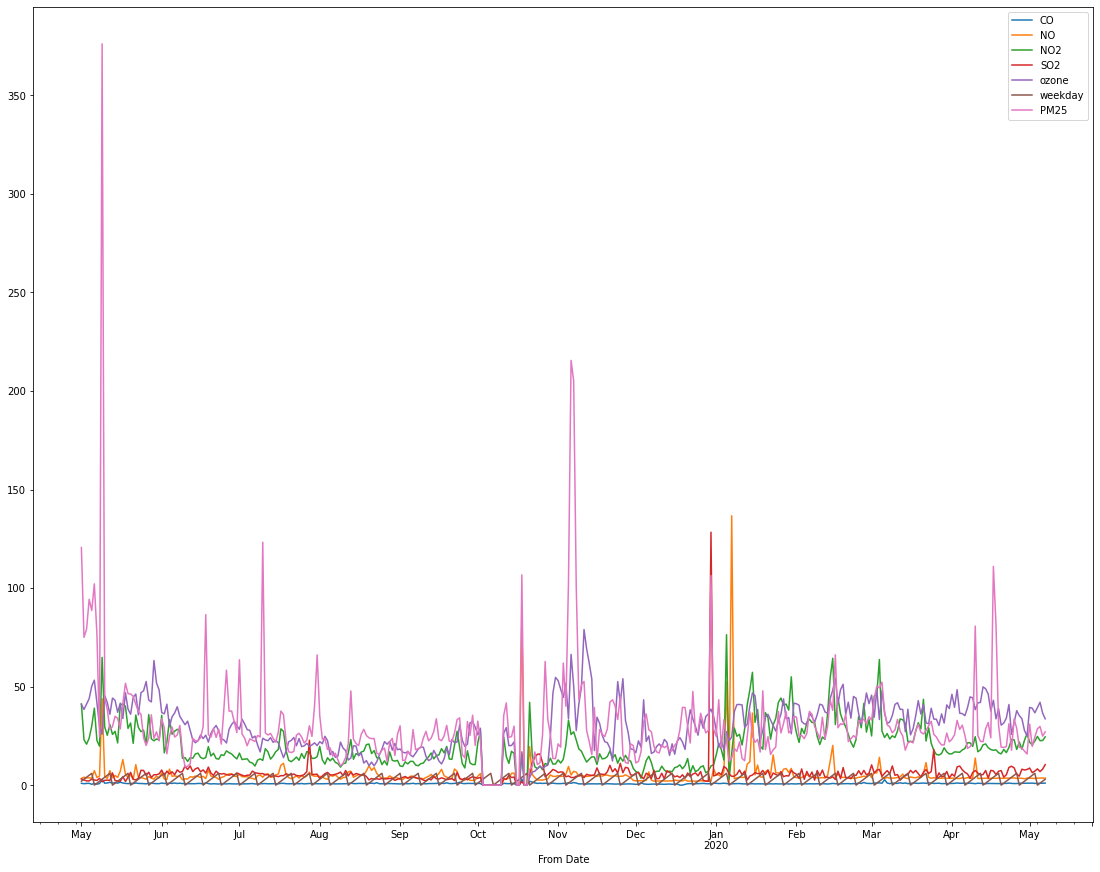

In [32]:
df1.plot(figsize=(19,15), legend=True)

In [33]:
#df1.dropna(axis=0,inplace=True)

In [34]:
'''df1['CO'] = df1['CO'].fillna(df1['CO'].mean(), inplace=True)
df1['NO'] = df1['NO'].fillna(df1['NO'].mean(), inplace=True)
df1['NO2'] = df1['NO2'].fillna(df1['NO2'].mean(), inplace=True)
df1['SO2'] = df1['SO2'].fillna(df1['SO2'].mean(), inplace=True)
df1['PM25'] = df1['PM25'].fillna(df1['PM25'].mean(), inplace=True)
df1['ozone'] = df1['ozone'].fillna(df1['ozone'].mean(), inplace=True)'''

"df1['CO'] = df1['CO'].fillna(df1['CO'].mean(), inplace=True)\ndf1['NO'] = df1['NO'].fillna(df1['NO'].mean(), inplace=True)\ndf1['NO2'] = df1['NO2'].fillna(df1['NO2'].mean(), inplace=True)\ndf1['SO2'] = df1['SO2'].fillna(df1['SO2'].mean(), inplace=True)\ndf1['PM25'] = df1['PM25'].fillna(df1['PM25'].mean(), inplace=True)\ndf1['ozone'] = df1['ozone'].fillna(df1['ozone'].mean(), inplace=True)"

In [35]:
df1['CO'] = df1['CO'].astype(str).astype(float)
df1['NO'] = df1['NO'].astype(str).astype(float)
df1['NO2'] = df1['NO2'].astype(str).astype(float)
df1['SO2'] = df1['SO2'].astype(str).astype(float)
df1['PM25'] = df1['PM25'].astype(str).astype(float)
df1['ozone'] = df1['ozone'].astype(str).astype(float)
df1['weekday'] = df1['weekday'].astype(str).astype(int)

In [36]:
len(df1)

373

In [39]:
df1.to_csv('AirQuality.csv',header=True,index=True)

In [ ]:
ax = df1['CO'].plot(title='CO_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
ax = df1['NO'].plot(title='NO_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
ax = df1['NO2'].plot(title='NO2_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
ax = df1['SO2'].plot(title='SO2_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
ax = df1['PM25'].plot(title='PM2.5_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
ax = df1['ozone'].plot(title='ozone_Plot', figsize=(16,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Value');


for day in df1.query('weekday>=3').index:
    ax.axvline(x=day,alpha=0.3, color='k')

In [ ]:
df1.columns

In [ ]:
df1.head()

In [ ]:
df1.index.freq = 'D'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results_CO = seasonal_decompose(df1['CO'])
results_CO.observed.plot(figsize=(12,2))